<h1><center>Analysis on Sales Data to Calculate and Predict Customer Lifetime Value (CLTV) with Machine Leaning</center></h1>

In this project, we will use machine learning to estimate the life time value, compute the customer life time value (CLTV), and analyze the market sales data set.

The **'Turkish Market Sales'** data set from Kaggle is used in this application.

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime, timedelta, date

In [2]:
data=pd.read_excel('MarketSales.xlsx')
data.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [4]:
data.info

<bound method DataFrame.info of               ID  ITEMCODE                         ITEMNAME  FICHENO  \
0        11738.0    5863.0  SPRITE 1 LT LIMON AROMALI GAZOZ    18456   
1        10537.0       8.0                        TOZ SEKER    18105   
2        11335.0    5979.0             FALIM SAKIZ 5LI NANE    18350   
3        11336.0    5979.0             FALIM SAKIZ 5LI NANE    18350   
4        10115.0   12808.0            FALIM SAKIZ 5LI CILEK    18005   
...          ...       ...                              ...      ...   
611103  511703.0       7.0                     EKMEK 250 GR   134656   
611104  511496.0       7.0                     EKMEK 250 GR   134630   
611105  492612.0       7.0                     EKMEK 250 GR   130100   
611106  512343.0       7.0                     EKMEK 250 GR   134762   
611107  512179.0    3942.0           ETI 80 GR KARAM BITTER   134738   

            DATE_  AMOUNT  PRICE  LINENETTOTAL  LINENET  BRANCHNR  ...  \
0      2017-01-07     1.0   2

# Exploratory Data Analysis (EDA)

In [3]:
#only required features for our analysis
data1=data[["CLIENTCODE", "DATE_", "FICHENO", "ITEMCODE", "LINENETTOTAL"]]
data1

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
0,467369,2017-01-07,18456,5863.0,2.00
1,131464,2017-01-06,18105,8.0,13.25
2,656969,2017-01-03,18350,5979.0,0.40
3,656969,2017-01-03,18350,5979.0,0.40
4,447336,2017-01-05,18005,12808.0,0.40
...,...,...,...,...,...
611103,374191,2017-03-18,134656,7.0,0.90
611104,656248,2017-03-18,134630,7.0,0.90
611105,78643,2017-03-15,130100,7.0,0.90
611106,926041,2017-03-18,134762,7.0,0.90


In [5]:
data1.isnull().sum()

CLIENTCODE      18348
DATE_               1
FICHENO             0
ITEMCODE         7167
LINENETTOTAL        1
dtype: int64

In [6]:
data1.dropna(inplace=True)

In [7]:
data1.isnull().sum()

CLIENTCODE      0
DATE_           0
FICHENO         0
ITEMCODE        0
LINENETTOTAL    0
dtype: int64

In [8]:
data1[data1.duplicated()]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
3,656969,2017-01-03,18350,5979.0,0.40
20,18004,2017-01-05,16638,2523.0,0.85
72,1032342,2017-01-05,16721,1919.0,1.50
115,747931,2017-01-02,15772,1623.0,0.85
147,140450,2017-01-03,15811,2700.0,0.35
...,...,...,...,...,...
611058,679673,2017-03-30,154727,19790.0,1.00
611087,557380,2017-03-18,134627,6983.0,0.25
611090,374191,2017-03-18,134656,6432.0,1.15
611092,128731,2017-03-18,134698,6223.0,5.20


In [9]:
data.loc[data.FICHENO==18350]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3206,11340.0,13917.0,NESCAFE 3 IN 1 CIKOLATALI 13 GR,18350,2017-01-03,2.0,0.35,0.70,0.65,40.0,...,656969,Yağız KUBAL,97,NESTLE,İÇECEK,ÇAY KAHVE,KAHVE,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3260,11338.0,2622.0,NESTLE NESGUIK SUT 180ML KAKAOLU,18350,2017-01-03,1.0,1.15,1.15,1.06,40.0,...,656969,Yağız KUBAL,97,NESTLE,SÜT KAHVALTILIK,SÜT,MEYVELİ SÜT,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5121,11326.0,149.0,ULKER PIKO 25GR-398,18350,2017-01-03,1.0,0.25,0.25,0.24,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,BÜSKİVİ ÇEREZ,BÜSKİVİ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5122,11327.0,131.0,ULKER ALBENI KEK 40GR,18350,2017-01-03,1.0,0.50,0.50,0.47,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,BÜSKİVİ ÇEREZ,KEK,2017-01-04 14:00:03,2017-01-04 14:01:01,E
5235,11339.0,21037.0,"ERIKLI DOGAL MEMBA SU 1,5LT",18350,2017-01-03,1.0,0.65,0.65,0.60,40.0,...,656969,Yağız KUBAL,43,ERİKLİ,İÇECEK,SU MADENSUYU,SU,2017-01-04 14:00:03,2017-01-04 14:01:01,E
16603,11329.0,2739.0,KENT OLIPS STICK MENTOL 28GR,18350,2017-01-03,1.0,0.75,0.75,0.69,40.0,...,656969,Yağız KUBAL,79,KENT,GIDA,SAKIZ SEKERLEME,ŞEKERLEME,2017-01-04 14:00:03,2017-01-04 14:01:01,E
20140,11337.0,899.0,ICIM SUT 200ML ALPELLA CIKOLATALI,18350,2017-01-03,3.0,0.99,2.97,2.75,40.0,...,656969,Yağız KUBAL,67,İÇİM SEHER,SÜT KAHVALTILIK,SÜT,PASTÖRİZE SÜT,2017-01-04 14:00:03,2017-01-04 14:01:01,E
50150,11333.0,22928.0,ULKER DIDO SUTLU GOFRET 40 GR.,18350,2017-01-03,1.0,0.75,0.75,0.69,40.0,...,656969,Yağız KUBAL,146,ÜLKER,GIDA,ÇİKOLATA GOFRET,NaN,2017-01-04 14:00:03,2017-01-04 14:01:01,E


In [11]:
data1.loc[data1.FICHENO==18350][data1.loc[data1.FICHENO==18350].duplicated()]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
3,656969,2017-01-03,18350,5979.0,0.4


In [12]:
data1.shape

(585821, 5)

In [14]:
data1.drop(data1[data1.duplicated()].index, axis=0, inplace=True)

In [15]:
data1.shape

(535105, 5)

In [16]:
data1[data1.duplicated(keep=False)]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535105 entries, 0 to 611107
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    535105 non-null  object        
 1   DATE_         535105 non-null  datetime64[ns]
 2   FICHENO       535105 non-null  int64         
 3   ITEMCODE      535105 non-null  float64       
 4   LINENETTOTAL  535105 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.5+ MB


In [18]:
data1.loc[data1.CLIENTCODE=="467369"]

,CLIENTCODE,DATE_,FICHENO,ITEMCODE,LINENETTOTAL
0,467369,2017-01-07,18456,5863.0,2.00
3363,467369,2017-01-07,18456,11022.0,1.79
11906,467369,2017-01-07,18456,3334.0,2.50
16715,467369,2017-01-07,18456,21683.0,6.93
20165,467369,2017-01-07,18456,3581.0,1.00
20167,467369,2017-01-07,18456,8072.0,2.00
20210,467369,2017-01-07,18456,3847.0,0.50
20232,467369,2017-01-07,18456,9129.0,2.45
20263,467369,2017-01-07,18456,1995.0,1.55
21223,467369,2017-01-07,18456,20133.0,6.85


In [20]:
#total amount of each invoice for each customer
total_per_FICHE= pd.DataFrame(data1.groupby(["CLIENTCODE", "DATE_", "FICHENO"]).LINENETTOTAL.sum().reset_index())
total_per_FICHE.head()

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1,2017-01-28,54511,0.50
1,1,2017-02-01,59977,85.85
2,1,2017-02-01,60106,7.80
3,1,2017-02-28,104605,20.09
4,10,2017-01-18,36591,1.25


In [21]:
#numeric values in X column
total_per_FICHE['CLIENTCODE'] = pd.to_numeric(total_per_FICHE['CLIENTCODE'], errors='coerce')
total_per_FICHE.head()

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,1.0,2017-02-01,59977,85.85
2,1.0,2017-02-01,60106,7.80
3,1.0,2017-02-28,104605,20.09
4,10.0,2017-01-18,36591,1.25


In [22]:
total_per_FICHE["CLIENTCODE"].isnull().sum()

4

In [24]:
#Droping Nulls
total_per_FICHE.dropna(inplace=True)
total_per_FICHE.head()

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,1.0,2017-02-01,59977,85.85
2,1.0,2017-02-01,60106,7.80
3,1.0,2017-02-28,104605,20.09
4,10.0,2017-01-18,36591,1.25


In [25]:
total_per_FICHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137493 entries, 0 to 137492
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    137493 non-null  float64       
 1   DATE_         137493 non-null  datetime64[ns]
 2   FICHENO       137493 non-null  int64         
 3   LINENETTOTAL  137493 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 5.2 MB


In [26]:
#Convert the FICHENO column to a categorical column
total_per_FICHE["CLIENTCODE"]= total_per_FICHE["CLIENTCODE"].astype('object')
total_per_FICHE["FICHENO"]= total_per_FICHE["FICHENO"].astype('object')
total_per_FICHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137493 entries, 0 to 137492
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CLIENTCODE    137493 non-null  object        
 1   DATE_         137493 non-null  datetime64[ns]
 2   FICHENO       137493 non-null  object        
 3   LINENETTOTAL  137493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.2+ MB


# Lifetime Value Prediction

We will compute RFM using a month's worth of data and use the result to forecast the next two months.Thus, we ought to start by creating two df and adding RFM ratings to them.

In [27]:
df_model= total_per_FICHE.copy()

In [28]:
print("First date in dataset: ", df_model['DATE_'].min())

First date in dataset:  2017-01-02 00:00:00


In [29]:
print("Last date in dataset: ", df_model['DATE_'].max())

Last date in dataset:  2017-03-31 00:00:00


In [30]:
df_last= df_model[(df_model.DATE_ >=  datetime.strptime("2017-2-1", '%Y-%m-%d')) & (df_model.DATE_ <= df_model['DATE_'].max())].reset_index(drop=True)

In [31]:
df_first= df_model[(df_model.DATE_ <  datetime.strptime("2017-2-1", '%Y-%m-%d')) & (df_model.DATE_ >= df_model['DATE_'].min())].reset_index(drop=True)

In [35]:
df_last.head()

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-02-01,59977,85.85
1,1.0,2017-02-01,60106,7.80
2,1.0,2017-02-28,104605,20.09
3,10.0,2017-03-15,129427,3.00
4,1000.0,2017-02-04,65029,7.49


In [34]:
df_last.shape

(94572, 4)

In [36]:
df_first.head()

,CLIENTCODE,DATE_,FICHENO,LINENETTOTAL
0,1.0,2017-01-28,54511,0.50
1,10.0,2017-01-18,36591,1.25
2,100.0,2017-01-13,28298,25.45
3,100.0,2017-01-16,33365,269.85
4,1000105.0,2017-01-16,33468,24.09


In [37]:
df_first.shape

(42921, 4)

In [38]:
RFM_df= pd.DataFrame(df_first['CLIENTCODE'].unique())
RFM_df.columns = ['CLIENTCODE']
RFM_df

,CLIENTCODE
0,1.0
1,10.0
2,100.0
3,1000105.0
4,1000117.0
...,...
29422,999862.0
29423,999894.0
29424,999903.0
29425,999966.0


In [39]:
#Recency
recency_df= df_first.groupby('CLIENTCODE')['DATE_'].max().reset_index()
recency_df

,CLIENTCODE,DATE_
0,1.0,2017-01-28
1,2.0,2017-01-28
2,3.0,2017-01-23
3,5.0,2017-01-23
4,7.0,2017-01-31
...,...,...
29422,1100895.0,2017-01-31
29423,1100898.0,2017-01-16
29424,1100931.0,2017-01-29
29425,1100971.0,2017-01-29


In [40]:
last_day_df_first= df_first['DATE_'].max()
last_day_df_first

Timestamp('2017-01-31 00:00:00')

In [41]:
recency_df['Recency']= recency_df['DATE_'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,CLIENTCODE,DATE_,Recency
0,1.0,2017-01-28,3
1,2.0,2017-01-28,3
2,3.0,2017-01-23,8
3,5.0,2017-01-23,8
4,7.0,2017-01-31,0
...,...,...,...
29422,1100895.0,2017-01-31,0
29423,1100898.0,2017-01-16,15
29424,1100931.0,2017-01-29,2
29425,1100971.0,2017-01-29,2


In [42]:
RFM_df= pd.merge(RFM_df, recency_df[['CLIENTCODE','Recency']], on='CLIENTCODE')
RFM_df.head()

,CLIENTCODE,Recency
0,1.0,3
1,10.0,13
2,100.0,15
3,1000105.0,15
4,1000117.0,8


In [43]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [44]:
#Building 4 clusters for recency and add it to dataframe
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,CLIENTCODE,Recency,RecencyCluster
0,1.0,3,2
1,10.0,13,3
2,100.0,15,3
3,1000105.0,15,3
4,1000117.0,8,0
...,...,...,...
29422,999862.0,10,0
29423,999894.0,10,0
29424,999903.0,17,3
29425,999966.0,13,3


In [45]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster
0,1.0,3,3
1,1000244.0,1,3
2,1000363.0,4,3
3,1000397.0,3,3
4,1000871.0,0,3


In [46]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,4983.0,23.087297,2.325268,20.0,21.0,23.0,25.0,29.0
1,6943.0,15.910701,1.948880,13.0,14.0,16.0,18.0,19.0
2,8828.0,8.935999,1.963726,6.0,7.0,9.0,11.0,12.0
3,8673.0,2.448980,1.724166,0.0,1.0,2.0,4.0,5.0


In [47]:
#Frequency
frequency_df= df_first.groupby(["CLIENTCODE"]).agg({"FICHENO":"nunique"}).reset_index()
frequency_df.rename(columns={"FICHENO":"Frequency"}, inplace=True)
frequency_df

,CLIENTCODE,Frequency
0,1.0,1
1,2.0,2
2,3.0,3
3,5.0,1
4,7.0,2
...,...,...
29422,1100895.0,2
29423,1100898.0,1
29424,1100931.0,1
29425,1100971.0,2


In [48]:
RFM_df= pd.merge(RFM_df, frequency_df, on='CLIENTCODE')
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency
0,1.0,3,3,1
1,1000244.0,1,3,3
2,1000363.0,4,3,2
3,1000397.0,3,3,2
4,1000871.0,0,3,1


In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster
0,1.0,3,3,1,1
1,1000244.0,1,3,3,2
2,1000363.0,4,3,2,0
3,1000397.0,3,3,2,0
4,1000871.0,0,3,1,1
...,...,...,...,...,...
29422,998964.0,21,0,1,1
29423,999038.0,21,0,1,1
29424,999159.0,21,0,1,1
29425,999451.0,25,0,1,1


In [50]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster
0,1.0,3,3,1,0
1,1000871.0,0,3,1,0
2,1001295.0,2,3,1,0
3,1001836.0,4,3,1,0
4,1002428.0,1,3,1,0


In [51]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,19134.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,7697.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,2077.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
3,519.0,4.165703,0.420859,4.0,4.0,4.0,4.0,6.0


In [52]:
#Monetary
monetary_df= df_first.groupby('CLIENTCODE')['LINENETTOTAL'].sum().reset_index()
monetary_df.columns = ['CLIENTCODE', 'Monetary']
monetary_df.head()

,CLIENTCODE,Monetary
0,1.0,0.50
1,2.0,15.14
2,3.0,37.37
3,5.0,6.50
4,7.0,34.87


In [53]:
RFM_df= pd.merge(RFM_df, monetary_df, on='CLIENTCODE')
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,1.0,3,3,1,0,0.50
1,1000871.0,0,3,1,0,46.31
2,1001295.0,2,3,1,0,4.89
3,1001836.0,4,3,1,0,26.16
4,1002428.0,1,3,1,0,17.21


In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,1.0,3,3,1,0,0.50,1
1,1000871.0,0,3,1,0,46.31,0
2,1001295.0,2,3,1,0,4.89,1
3,1001836.0,4,3,1,0,26.16,1
4,1002428.0,1,3,1,0,17.21,1


In [55]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,1.0,3,3,1,0,0.50,0
1,1001295.0,2,3,1,0,4.89,0
2,1001836.0,4,3,1,0,26.16,0
3,1002428.0,1,3,1,0,17.21,0
4,1002551.0,1,3,1,0,13.37,0


In [56]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,21961.0,9.613742,7.128473,0.01,3.500,8.000,14.6000,26.90
1,5933.0,44.350615,13.908292,26.91,32.710,40.810,53.6100,80.21
2,1347.0,116.515160,30.121967,80.26,91.915,108.230,135.1850,200.94
3,186.0,287.551022,120.081384,202.23,224.325,257.555,309.0075,1439.20


In [87]:
#overall scoring(0 to 2: Low Value, 3 to 4: Mid Value and 5+: High Value)
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value'
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,1.0,3,3,1,0,0.50,0,3,Mid-Value
1,1001295.0,2,3,1,0,4.89,0,3,Mid-Value
2,1001836.0,4,3,1,0,26.16,0,3,Mid-Value
3,1002428.0,1,3,1,0,17.21,0,3,Mid-Value
4,1002551.0,1,3,1,0,13.37,0,3,Mid-Value


In [88]:
RFM_df.shape

(29427, 9)

In [58]:
RFM_df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,23.258374,1.000000,7.877505
1,17.091326,1.056362,11.872337
2,11.254886,1.175745,14.835833
3,6.283548,1.362354,19.076279
4,5.227568,1.926138,32.926421
5,4.543157,2.354793,54.597558
6,3.389408,2.916926,72.810062
7,3.208232,3.598063,100.709831
8,2.485981,4.028037,148.530561


In [59]:
monetary_df_last= df_last.groupby('CLIENTCODE')['LINENETTOTAL'].sum().reset_index()
monetary_df_last.columns = ['CLIENTCODE', 'lastMonthsMonetary']
monetary_df_last['CLIENTCODE']= monetary_df_last['CLIENTCODE'].astype("object")
monetary_df_last.head()

,CLIENTCODE,lastMonthsMonetary
0,1.0,113.74
1,2.0,86.68
2,3.0,89.41
3,4.0,76.80
4,5.0,1.25


In [60]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44286 entries, 0 to 44285
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          44286 non-null  object 
 1   lastMonthsMonetary  44286 non-null  float64
dtypes: float64(1), object(1)
memory usage: 692.1+ KB


In [62]:
#Merging our 1 months and 2 months dataframes to see the feature set
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='CLIENTCODE', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['CLIENTCODE']= RFM_df_NEW['CLIENTCODE'].astype("object")
RFM_df_NEW.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,1.0,3,3,1,0,0.50,0,3,Mid-Value,113.74
1,1001295.0,2,3,1,0,4.89,0,3,Mid-Value,0.00
2,1001836.0,4,3,1,0,26.16,0,3,Mid-Value,37.87
3,1002428.0,1,3,1,0,17.21,0,3,Mid-Value,54.60
4,1002551.0,1,3,1,0,13.37,0,3,Mid-Value,74.96


In [63]:
RFM_df_NEW.shape

(29427, 10)

In [64]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  int64  
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  int64  
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  int64  
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 2.5+ MB


In [65]:
#creating 3 clusters (Low ,Mid and High)
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [66]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,1.0,3,3,1,0,0.50,0,3,Mid-Value,113.74,1
1,1002428.0,1,3,1,0,17.21,0,3,Mid-Value,54.60,1
2,1002551.0,1,3,1,0,13.37,0,3,Mid-Value,74.96,1
3,1009997.0,5,3,1,0,6.00,0,3,Mid-Value,94.29,1
4,1010711.0,3,3,1,0,3.00,0,3,Mid-Value,58.77,1


In [67]:
RFM_df_NEW.shape

(29427, 11)

In [68]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,22947.0,12.530689,12.144772,0.00,1.2500,9.200,20.85,42.65
1,5746.0,72.986706,25.739696,42.69,52.2600,65.445,88.10,144.87
2,734.0,217.334278,127.625443,144.92,162.9625,189.360,233.50,2838.65


following CLTV clustering. With an average CLTV of 219, 2 is the greatest, while 0 is the poorest, with 12.

# Data Preprocessing and Feature Engineering

In [69]:
df_ML= df_LTVCluster.copy()
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  int64  
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  int64  
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  int64  
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
 10  LTVCluster          29427 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.7+ MB


In [70]:
#convert columns which we thought to be categorical column into a categorical column
for i in ["CLIENTCODE","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

In [71]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29427 entries, 0 to 29426
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENTCODE          29427 non-null  object 
 1   Recency             29427 non-null  int64  
 2   RecencyCluster      29427 non-null  object 
 3   Frequency           29427 non-null  int64  
 4   FrequencyCluster    29427 non-null  object 
 5   Monetary            29427 non-null  float64
 6   MonetaryCluster     29427 non-null  object 
 7   OverallScore        29427 non-null  int64  
 8   Segment             29427 non-null  object 
 9   lastMonthsMonetary  29427 non-null  float64
 10  LTVCluster          29427 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.7+ MB


In [72]:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

In [73]:
#Applying StandardScaler for numerical columns
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])

In [74]:
#Categorical columns
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['CLIENTCODE',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

In [75]:
#Converingt categorical columns to numerical by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,CLIENTCODE,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,0,-1.067447,3,-0.63993,0,-0.637040,0,0.30173,2,1.829103,1
1,26995,-1.332125,3,-0.63993,0,-0.169488,0,0.30173,2,0.545850,1
2,27001,-1.332125,3,-0.63993,0,-0.276933,0,0.30173,2,0.987633,1
3,27183,-0.802769,3,-0.63993,0,-0.483148,0,0.30173,2,1.407066,1
4,27203,-1.067447,3,-0.63993,0,-0.567089,0,0.30173,2,0.636333,1


In [76]:
#Creating X and y, X will be feature set and y is the label set
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

In [77]:
#spliting training and testing sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Machine Learning Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [79]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}

In [80]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
Gradient Boosting training started
Gradient Boosting trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: user 15.9 s, sys: 598 ms, total: 16.5 s
Wall time: 15.4 s


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [82]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.75
Logistic Regression accuracy score :  0.783
Random Forest accuracy score :  0.752
Gradient Boosting accuracy score :  0.782
XG Boosting accuracy score :  0.776


Logistic Regression and Gradient Boosting has Best accuracy of 78.3% and 78.2% respectively

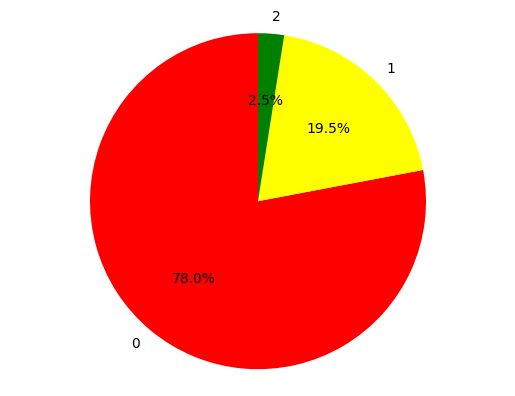

In [84]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Cluster 0, which makes up 78.4% of the entire base, is the largest cluster we have. Assuming that every consumer is a member of cluster 0, our accuracy rate would be 78.4%.

79% vs. 78.4% indicate that while our machine learning model is good, it definitely needs to be improved. We ought to ascertain the model's weak points.

In [85]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.78      0.94      0.86      6913
           1       0.21      0.06      0.10      1703
           2       0.00      0.00      0.00       213

    accuracy                           0.75      8829
   macro avg       0.33      0.34      0.32      8829
weighted avg       0.65      0.75      0.69      8829

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6913
           1       0.00      0.00      0.00      1703
           2       0.00      0.00      0.00       213

    accuracy                           0.78      8829
   macro avg       0.26      0.33      0.29      8829
weighted avg       0.61      0.78      0.69      8829

******************************
 
Random Forest classifica